In [2]:
from sklearn import datasets
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Fetuare Selection using Lasso

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1], test_size=0.2,random_state=1)

In [9]:
X_train.shape

(614, 8)

In [15]:
from sklearn.preprocessing import StandardScaler
cols=X_train.columns

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled,columns=cols)
X_test = pd.DataFrame(X_test_scaled,columns=cols)

In [19]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [21]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)

lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [23]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<AxesSubplot:>

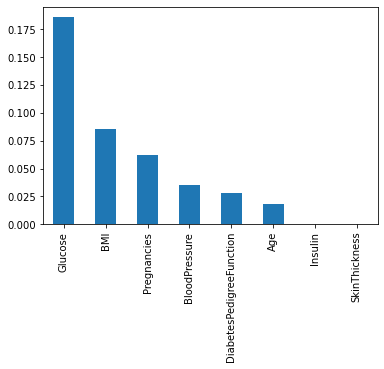

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x=pd.Series(np.abs(lasso.coef_),index=cols)
x.sort_values(ascending=False).plot(kind='bar')

#### We can also use ridge or elasticnet

 # Feature Selection for Decison Tree

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1], test_size=0.2,random_state=1)

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
dt.feature_importances_

array([0.08509362, 0.29287195, 0.1025562 , 0.04526501, 0.03175617,
       0.17909427, 0.11812441, 0.14523836])

<AxesSubplot:>

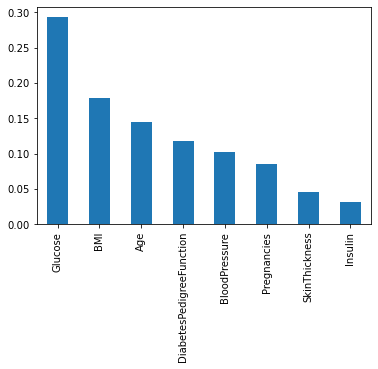

In [44]:
x=pd.Series(dt.feature_importances_,index=cols)
x.sort_values(ascending=False).plot(kind='bar')

#Random Forest

In [57]:

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
rf.feature_importances_

array([0.088927  , 0.25724419, 0.09494389, 0.07156761, 0.08070376,
       0.15166806, 0.12862395, 0.12632154])

<AxesSubplot:>

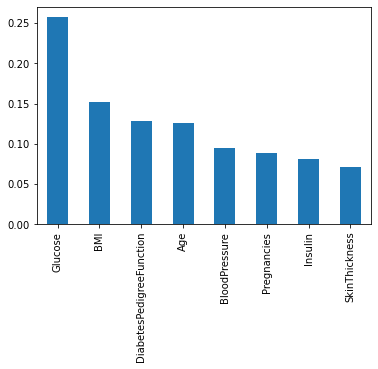

In [61]:
x=pd.Series(rf.feature_importances_,index=cols)
x.sort_values(ascending=False).plot(kind='bar')

# Select From Model

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1], test_size=0.2,random_state=1)


In [70]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()


In [88]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(model,threshold='mean')

In [90]:
sfm.fit(X_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [92]:
sfm.get_support(indices=True)

array([1, 5, 7])

In [94]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [96]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,Age
0,145.0,37.9,40.0
1,129.0,41.2,38.0
2,102.0,37.2,45.0
3,120.0,25.0,64.0
4,120.0,39.7,29.0
...,...,...,...
609,157.0,39.4,30.0
610,187.0,33.9,34.0
611,126.0,43.4,42.0
612,171.0,43.6,26.0


# Recursive Feature Elimination

In [99]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [105]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [107]:
#here we are not spliting into train and test split but needs to be done 
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [109]:
rf.feature_importances_

array([0.10333714, 0.02180192, 0.42208835, 0.4527726 ])

In [111]:
#as sepal width as lowest importance
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [113]:
rf=RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [115]:
rf.feature_importances_

array([0.18453683, 0.40313996, 0.41232321])

In [117]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [119]:
rf.fit(X,y)

RandomForestClassifier()

In [121]:
rf.feature_importances_

array([0.47105548, 0.52894452])

In [125]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [127]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")


Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 1
petal_width: 2


# Mutual Info

In [132]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [134]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob

B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [136]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.49470665791603263
Feature 1: Mutual Information = 0.2050813866395793
Feature 2: Mutual Information = 0.981496681818582
Feature 3: Mutual Information = 0.9846677975635132


In [138]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
